In [1]:
library(gstat)
library(sp)
library(spacetime)
library(raster)
library(rgdal)
library(rgeos)



rgdal: version: 1.3-6, (SVN revision 773)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.3.3, released 2018/12/14
 Path to GDAL shared files: /home/satbigvm/anaconda3/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 5.2.0, September 15th, 2018, [PJ_VERSION: 520]
 Path to PROJ.4 shared files: /home/satbigvm/anaconda3/share/proj
 Linking to sp version: 1.3-1 
rgeos version: 0.3-28, (SVN revision 572)
 GEOS runtime version: 3.7.1-CAPI-1.11.1 0 
 Linking to sp version: 1.3-1 
 Polygon checking: TRUE 



In [2]:
load(file="final.RData")
var

np   dist        gamma     id    timelag spacelag   avgDist  
1     209   942.4434   4381.940 lag1  2.5       583.1849   163.313
2    1157  1827.1980   8223.363 lag1  2.5      1749.5547  1828.815
3    1813  3005.1912   5500.141 lag1  2.5      2915.9244  3010.161
4    2307  4070.9896   7304.009 lag1  2.5      4082.2942  4070.622
5    3128  5260.5127   7762.822 lag1  2.5      5248.6640  5259.369
6    3514  6408.2162   8989.936 lag1  2.5      6415.0338  6407.977
7    3508  7655.2692  11569.030 lag1  2.5      7581.4036  7652.376
8    3900  8769.1404  10562.625 lag1  2.5      8747.7733  8768.160
9    3711  9908.1369  10818.558 lag1  2.5      9914.1431  9909.120
10   4038 11100.7956  10219.025 lag1  2.5     11080.5129 11097.907
11   3971 12250.0647  11519.345 lag1  2.5     12246.8827 12246.914
12   3586 13421.4802  10083.312 lag1  2.5     13413.2525 13419.273
13   3240 14570.4883   8166.664 lag1  2.5     14579.6222 14566.315
14   3596 15761.0414  11807.327 lag1  2.5     15745.9920 15760.584
15   3533 16928.0139   9202.762 lag1  2.5     16912.3618 16924.820
16   2530   157.7313   1046.164 lag2  7.5       583.1849   163.313
17   2281  1830.4884   8156.228 lag2  7.5      1749.5547  1828.815
18   3567  3007.4509   5596.105 lag2  7.5      2915.9244  3010.161
19   4622  4071.0955   7180.830 lag2  7.5      4082.2942  4070.622
20   6161  5261.2792   7709.059 lag2  7.5      5248.6640  5259.369
21   7024  6407.2992   8789.730 lag2  7.5      6415.0338  6407.977
22   6994  7651.2695  11603.905 lag2  7.5      7581.4036  7652.376
23   7791  8770.3638  10658.412 lag2  7.5      8747.7733  8768.160
24   7358  9908.5635  10909.225 lag2  7.5      9914.1431  9909.120
25   8045 11101.0242  10294.969 lag2  7.5     11080.5129 11097.907
26   7771 12249.9808  11484.922 lag2  7.5     12246.8827 12246.914
27   7128 13419.8717  10056.205 lag2  7.5     13413.2525 13419.273
28   6464 14565.4638   8106.195 lag2  7.5     14579.6222 14566.315
29   7055 15760.8161  11795.499 lag2  7.5     15745.9920 15760.584
30   7061 16925.5435   9129.216 lag2  7.5     16912.3618 16924.820
⋮    ⋮    ⋮           ⋮         ⋮     ⋮       ⋮          ⋮        
1051  37    159.28286  2029.811 lag71 352.5     583.1849   163.313
1052  27   1824.99892  9211.815 lag71 352.5    1749.5547  1828.815
1053  57   3000.65468  5542.281 lag71 352.5    2915.9244  3010.161
1054  88   4062.14208  7450.227 lag71 352.5    4082.2942  4070.622
1055 106   5251.98366  8288.495 lag71 352.5    5248.6640  5259.369
1056 125   6389.80624  5794.532 lag71 352.5    6415.0338  6407.977
1057 111   7645.28125  8154.793 lag71 352.5    7581.4036  7652.376
1058 129   8769.19662  9253.814 lag71 352.5    8747.7733  8768.160
1059 114   9903.78795  8750.390 lag71 352.5    9914.1431  9909.120
1060 120  11058.42413  7819.100 lag71 352.5   11080.5129 11097.907
1061 137  12278.09839  9853.938 lag71 352.5   12246.8827 12246.914
1062 116  13433.47700  6758.276 lag71 352.5   13413.2525 13419.273
1063  96  14603.68068  4034.245 lag71 352.5   14579.6222 14566.315
1064 109  15787.24360 10207.977 lag71 352.5   15745.9920 15760.584
1065 129  16911.02878  7038.066 lag71 352.5   16912.3618 16924.820
1066  11     99.90323  2150.318 lag72 357.5     583.1849   163.313
1067   9   1794.48563  6664.278 lag72 357.5    1749.5547  1828.815
1068  17   2980.81005  8320.647 lag72 357.5    2915.9244  3010.161
1069  24   4045.33235  8572.375 lag72 357.5    4082.2942  4070.622
1070  30   5142.61705  7573.800 lag72 357.5    5248.6640  5259.369
1071  40   6357.95034  6284.988 lag72 357.5    6415.0338  6407.977
1072  31   7671.37352  9077.839 lag72 357.5    7581.4036  7652.376
1073  38   8742.70371 10957.368 lag72 357.5    8747.7733  8768.160
1074  36   9900.98885  7363.125 lag72 357.5    9914.1431  9909.120
1075  34  11031.47189  6812.632 lag72 357.5   11080.5129 11097.907
1076  39  12263.37399 11575.077 lag72 357.5   12246.8827 12246.914
1077  38  13441.72055  8445.197 lag72 357.5   13413.2525 13419.273
1078  29  14627.62591  4185.569 lag72 357.5   14579.

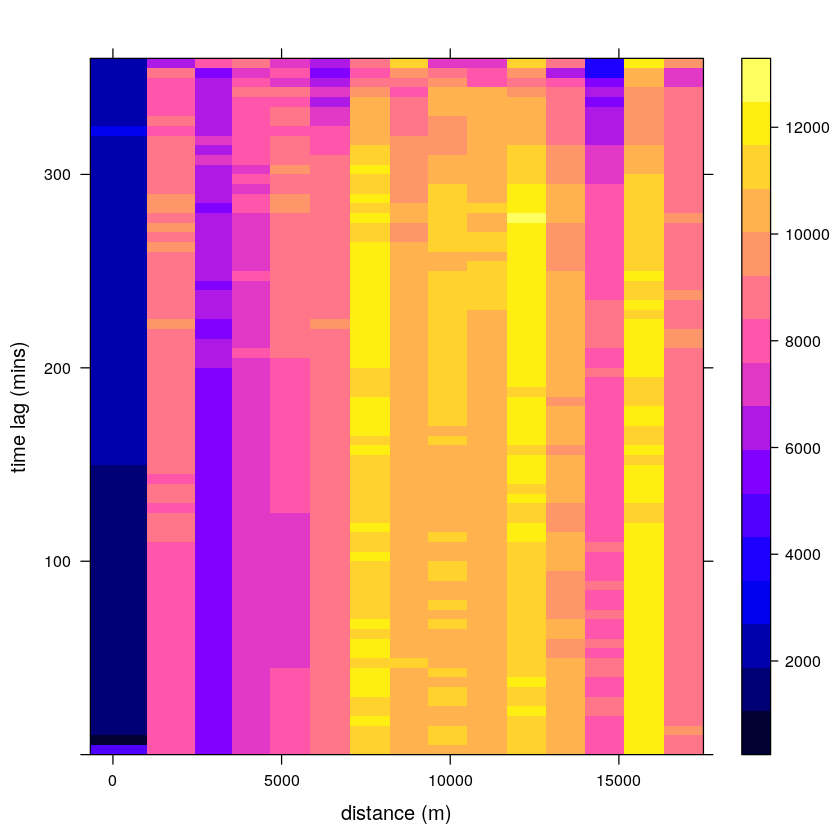

In [5]:
plot(var,map=T)

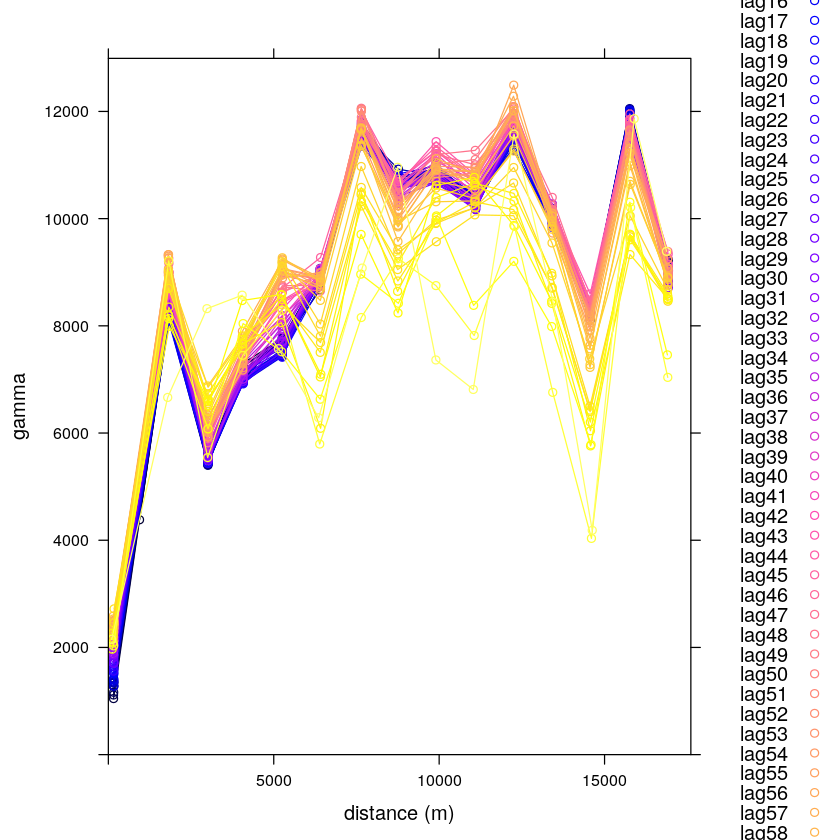

In [7]:
plot(var,map=F)

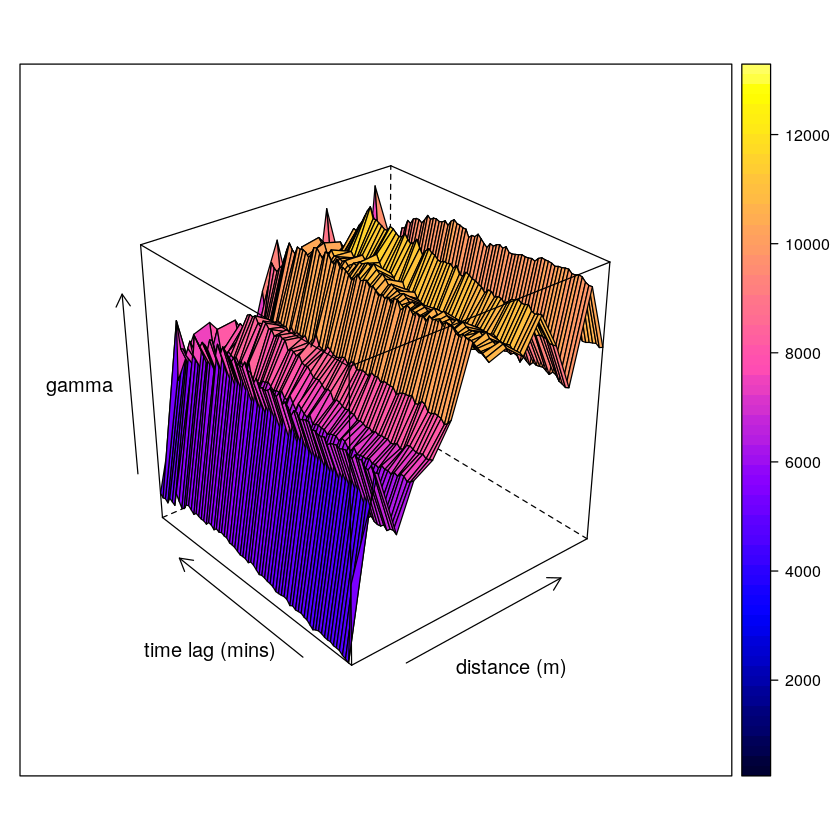

In [6]:
plot(var,wireframe=T)

[1] 2138607

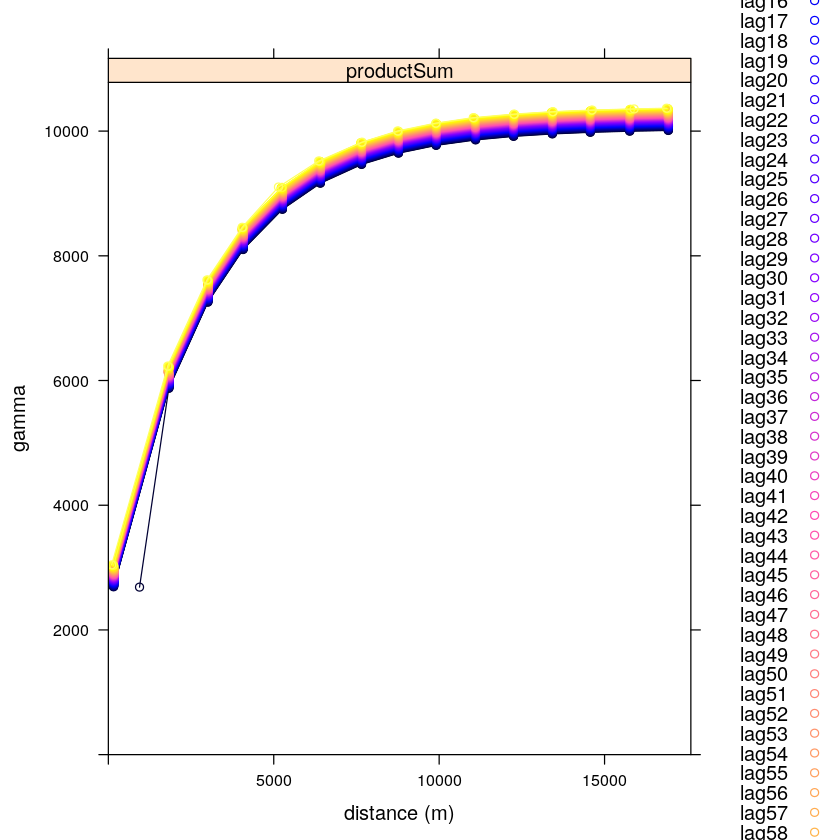

In [3]:
# PRODUCT SUM MODEL
prodSumModel <- vgmST("productSum",space = vgm(7000, "Exp", 6000, 0.5),time = vgm(10000, "Exp",150, 0.5),k = 50) 
prodSumModel_Vgm <- fit.StVariogram(var, prodSumModel,method = "L-BFGS-B",fit.time=TRUE)
attr(prodSumModel_Vgm, "MSE")
plot(var,prodSumModel_Vgm,map=F) 

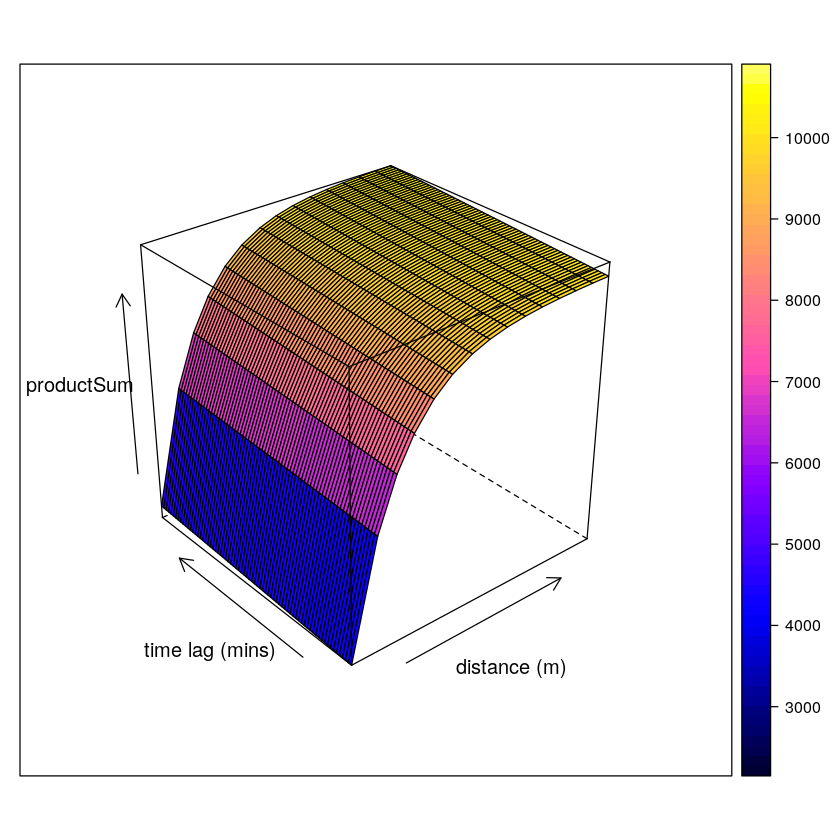

In [4]:
plot(var,prodSumModel_Vgm,wireframe=T)

In [5]:
test_data <- na.omit(test_data)
test_data <- test_data[order(test_data$Time),]
test_data_store <- test_data


In [6]:
#Create a SpatialPointsDataFrame
coordinates(test_data)=~long+lat
projection(test_data)=CRS("+init=epsg:4326")
#Transform into Mercator Projection
test_vehicles.UTM <- spTransform(test_data,CRS("+init=epsg:3395"))

In [7]:
# Dataframes for STIDF
test_vehiclesSP <- SpatialPoints(test_vehicles.UTM@coords,CRS("+init=epsg:3395"))
test_vehiclesTM <- as.POSIXct(test_vehicles.UTM$gentime,tz="CET")
tm.grid <- seq(as.POSIXct('2019-02-16 08:30:00 CET'),as.POSIXct('2019-02-16 13:40:00 CET'),length.out=1348)
# # print(head(tm.grid))
# # print(head(unique(vehiclesTM)))
# # tm.grid <- unique(vehiclesTM)
# # Merge
# grid.ST <- STF(test_vehiclesSP,tm.grid) 
# print(head(grid.ST))


In [8]:
grid.ST<- STI(test_vehiclesSP,test_vehiclesTM)

In [9]:
pred <- krigeST(Cars~1, data=timeDF, modelList=prodSumModel_Vgm, newdata=grid.ST)

In [10]:
predictions <- slot(pred,'data')
test_data_store$krigging_pred <- predictions

In [102]:
print(test_data_store)

        X FID     Time Car X2.w X3.w minibus bus light.commercial.vehicle
137   136   2 08:05:00 159   46   43       1  10                        1
271   270   4 08:05:00  65   50   31       0   4                        0
641   640  10 08:05:00  90   30   45       0   2                        3
917   916  14 08:05:00  23   38   27       1   8                        0
1441 1440  23 08:05:00 165  150   38       2   9                        2
1493 1492  24 08:05:00 264  134   19       1  12                        2
1817 1816  29 08:05:00  80   55   17       2   2                        0
2481 2480  40 08:05:00  48   34   10       1   2                        0
3625 3624  57 08:05:00  94   54   17       1   4                        0
138   137   2 08:10:00 158   45   29       0   6                        2
204   203   3 08:10:00  52   65   14       0   4                        1
272   271   4 08:10:00  92   65   32       0   9                        0
486   485   7 08:10:00  58   12   10  

In [ ]:
159,65,90,23,165,264,80,48,94,158
218,69,101,5,173,241,67,43,111,219

In [25]:
final_vals <- test_data_store[,c(4,23)]
names(final_vals)<- c("Actual", "Predicted")
print(final_vals)

     Actual  var1.pred
137     159 218.880312
271      65  69.208824
641      90 100.833273
917      23   4.724503
1441    165 172.880945
1493    264 241.645229
1817     80  67.669186
2481     48  42.947724
3625     94 110.997707
138     158 219.264360
204      52  67.995984
272      92  59.253159
486      58  55.588070
555     189 138.199024
578      91 147.141958
713     174 111.980132
1043     49  83.619254
2094     69  63.899352
2163     36  38.181357
2482     71  35.147033
2964    149 154.816387
3224    288 228.727683
3293    225 296.519239
3626     82  93.400871
139     171 212.608620
205      62  69.687423
415      16  23.603413
556     209 115.099383
783      22 -15.465079
986      97  95.901275
1371     95  95.940417
2290     49  38.057605
2483     36  22.930335
2758    143 185.244410
2965    142 142.280403
3034     66  58.561518
3507     68  78.940286
3627    138  99.693526
3790    134 116.153412
3962     36   2.721020
4095    148 127.478244
4151     34  15.303862
4211     63

In [35]:
final_vals$difsq <- (final_vals$Actual - final_vals$Predicted)^2
final_vals$dif <- (final_vals$Actual - final_vals$Predicted)
final_vals$absdif <- abs(final_vals$Actual - final_vals$Predicted)
final_vals$reldif <- abs((final_vals$Actual - final_vals$Predicted)/final_vals$Actual)
n <- nrow(final_vals)


In [30]:
print(final_vals)

     Actual  var1.pred    var1.pred     var1.pred    var1.pred
137     159 218.880312 3.585652e+03  -59.88031166  59.88031166
271      65  69.208824 1.771420e+01   -4.20882391   4.20882391
641      90 100.833273 1.173598e+02  -10.83327270  10.83327270
917      23   4.724503 3.339938e+02   18.27549747  18.27549747
1441    165 172.880945 6.210929e+01   -7.88094485   7.88094485
1493    264 241.645229 4.997358e+02   22.35477108  22.35477108
1817     80  67.669186 1.520490e+02   12.33081359  12.33081359
2481     48  42.947724 2.552549e+01    5.05227561   5.05227561
3625     94 110.997707 2.889221e+02  -16.99770728  16.99770728
138     158 219.264360 3.753322e+03  -61.26435957  61.26435957
204      52  67.995984 2.558715e+02  -15.99598442  15.99598442
272      92  59.253159 1.072356e+03   32.74684147  32.74684147
486      58  55.588070 5.817405e+00    2.41192976   2.41192976
555     189 138.199024 2.580739e+03   50.80097634  50.80097634
578      91 147.141958 3.151919e+03  -56.14195762  56.1

In [42]:
rss <- sum(final_vals$difsq)
# rss
mse <- rss/n
print('MSE')
mse

[1] "MSE"


[1] 755.2078

In [43]:
rmse <- sqrt(mse)
rmse
print('RMSE')

[1] 27.48104

[1] "RMSE"


In [45]:
mae <- sum(final_vals$absdif)/n
print('MAE')
mae

[1] "MAE"


[1] 18.94512

In [44]:
mape <- sum(final_vals$reldif)/n
print('MAPE')
mape

[1] "MAPE"


[1] 0.2483205

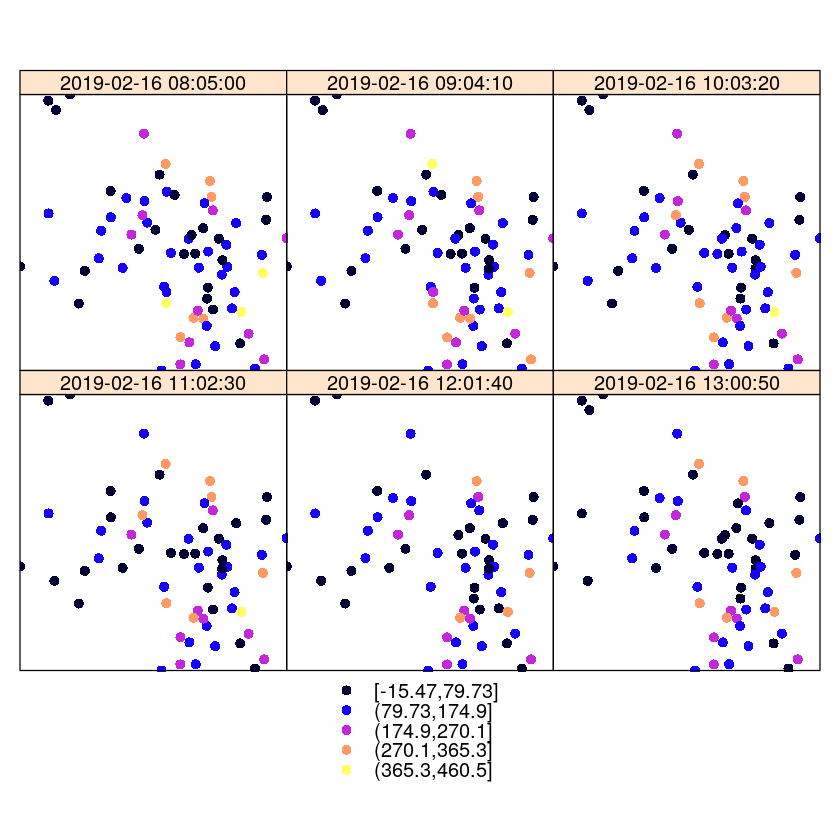

In [46]:
stplot(pred)